In [8]:
%matplotlib inline
from IPython.display import display, Math
from sympy import *
init_session()

IPython console for SymPy 1.8 (Python 3.7.10-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

import random
import numpy as npc

In [10]:
# バブルソート
n = 10
a = [3,1,4,1,5,9,2,6,5,3] # 配列の定義
for i in range(n): # range(t) で 0 から t-1 まで
    for k in range(1,n-i): # range(s,t) で s から t-1 まで
        if a[n-k-1] > a[n-k]: # 左の方が大きければ交換
            a[n-k-1],a[n-k]=a[n-k],a[n-k-1]
            print(a)

[3, 1, 4, 1, 5, 9, 2, 6, 3, 5]
[3, 1, 4, 1, 5, 9, 2, 3, 6, 5]
[3, 1, 4, 1, 5, 2, 9, 3, 6, 5]
[3, 1, 4, 1, 2, 5, 9, 3, 6, 5]
[3, 1, 1, 4, 2, 5, 9, 3, 6, 5]
[1, 3, 1, 4, 2, 5, 9, 3, 6, 5]
[1, 3, 1, 4, 2, 5, 9, 3, 5, 6]
[1, 3, 1, 4, 2, 5, 3, 9, 5, 6]
[1, 3, 1, 4, 2, 3, 5, 9, 5, 6]
[1, 3, 1, 2, 4, 3, 5, 9, 5, 6]
[1, 1, 3, 2, 4, 3, 5, 9, 5, 6]
[1, 1, 3, 2, 4, 3, 5, 5, 9, 6]
[1, 1, 3, 2, 3, 4, 5, 5, 9, 6]
[1, 1, 2, 3, 3, 4, 5, 5, 9, 6]
[1, 1, 2, 3, 3, 4, 5, 5, 6, 9]


In [11]:
N = 20
data = [random.randint(0,100) for i in range(N)]

# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots()
plt.close()


#plt.title("The Unsorted data")
#plt.bar(np.arange(len(data)), data)
#plt.show()
#fig = plt.figure()

datalist = [data]
def bubble_sort(data):
    N = len(data)
    done = False
    while not done:
        swapped = False
        for i in range(N-1):
            if data[N-i-2] > data[N-i-1]:
                data[N-i-2], data[N-i-1] = data[N-i-1], data[N-i-2]
                swapped = True
                datalist.append(data.copy())
        if not swapped:
            done = True
    return data,datalist

data,datalist = bubble_sort(data)
print(len(datalist))

def init():
    return plt.bar(np.arange(len(data)), data)

def update(i,datalist):
    mycolor='blue'
    #print(datalist[i])
    if i != 0:
        ax.cla()
    if i == len(datalist) -1:
        mycolor='orange'
    return (ax.bar(np.arange(len(datalist[i])), datalist[i],color=mycolor),)

ani = animation.FuncAnimation(fig, update, init_func=init, fargs = [datalist],
                              interval=150, repeat=False,frames=len(datalist))


98


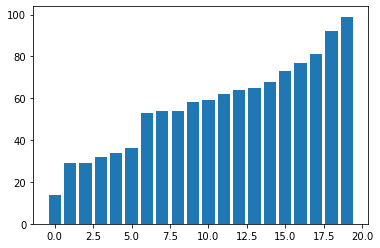

In [12]:
# アニメーションによる表示
from IPython.display import HTML
from matplotlib import animation, rc

from IPython.display import HTML

ax.cla()
rc('animation', html='jshtml')
HTML(ani.to_html5_video())

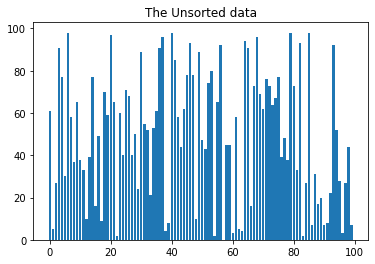

134 134


In [17]:
# クイックソート
N = 100
data = [random.randint(0,100) for i in range(N)]
plt.title("The Unsorted data")
plt.bar(np.arange(len(data)), data)
plt.show()

# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots()
plt.close()


#fig = plt.figure()

datalist = [data]
def quick_sort(data,i,j,datalist=[],swap=[0]):
    if j-i<=1:
        if data[i] > data[j]:
            data[i],data[j]=data[j],data[i]
            swap[0]=swap[0]+1
            datalist.append(data.copy())
        return
    f = 0
    c = data[i]
    for k in range(i+1,j+1):
        if c != data[k]:
            f = 1
            c = (c+data[k])/2
            break
    if f==0:
        return
    else:
        #print(data)
        #print (i,j,c)
        k1 = i
        k2 = j
        while(k1<=j and k2>=i and k1<k2):
            while(k1<=k2 and data[k1]<c):
                k1=k1+1
            while(k2>=k1 and data[k2]>=c):
                k2=k2-1
            if (k1<k2):
                data[k1],data[k2]=data[k2],data[k1]
                swap[0]=swap[0]+1
                datalist.append(data.copy())
        if data[k1]<c:
            i2=k1
        else:
            i2=k1-1
        quick_sort(data,i,i2,datalist=datalist,swap=swap)
        quick_sort(data,i2+1,j,datalist=datalist,swap=swap)
swap = [0]
datalist = []
quick_sort(data,0,N-1,datalist,swap)
print(swap[0],len(datalist))
def update(i,datalist):
    mycolor='blue'
    if i != 0:
        ax.cla()
    if i == len(datalist) -1:
        mycolor='orange'
    return (ax.bar(np.arange(len(datalist[i])), datalist[i],color=mycolor),)

ani = animation.FuncAnimation(fig, update, fargs = ([datalist]),interval=10**4/swap[0], 
                              repeat=False,frames=len(datalist)) 
#ani.save("quicksort.mp4")
#plt.title("All sorted")
#plt.bar(np.arange(len(data)), data)
#plt.show()

In [18]:
# アニメーションによる表示
from IPython.display import HTML
from matplotlib import animation, rc

from IPython.display import HTML

ax.cla()
rc('animation', html='jshtml')
HTML(ani.to_html5_video())